In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("evaluation_scores.csv", sep="\t")
df.columns = df.columns.str.strip()  # Clean up any whitespace

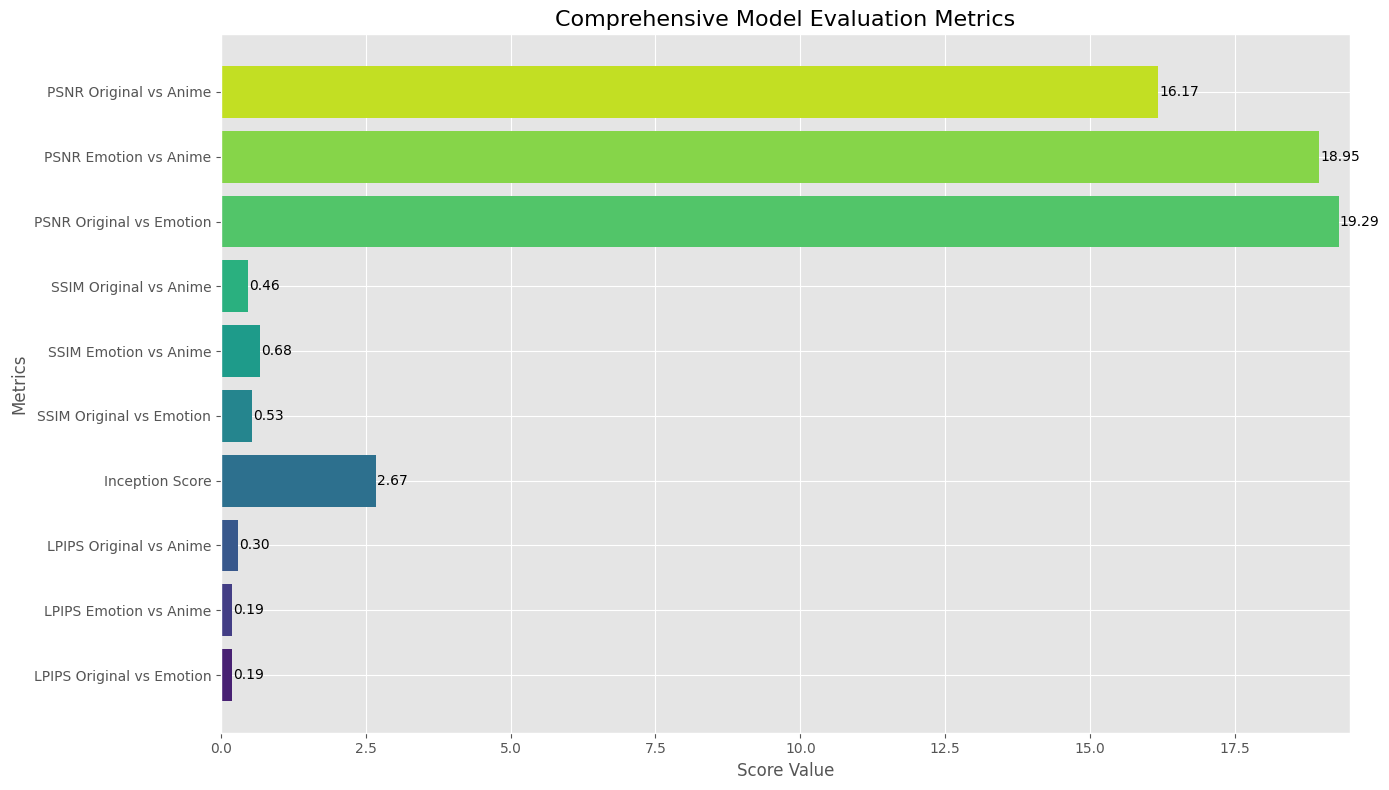

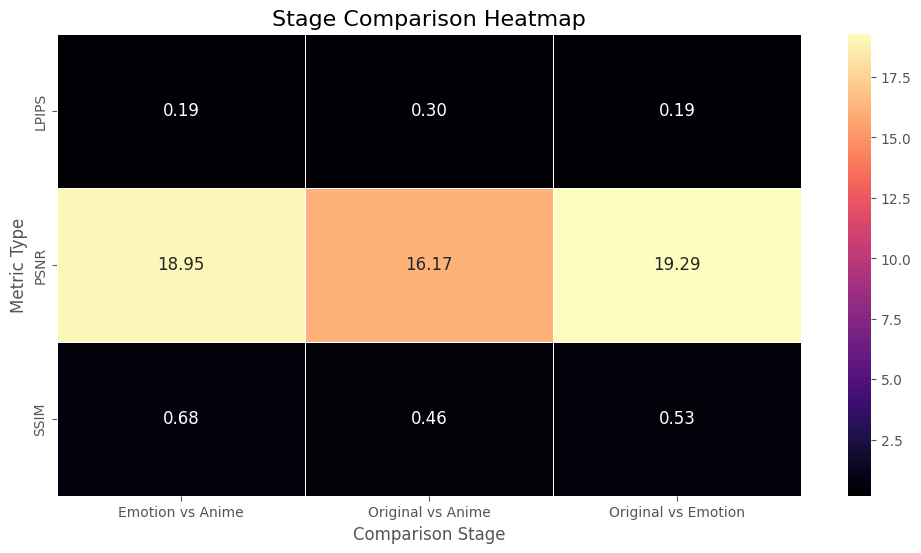

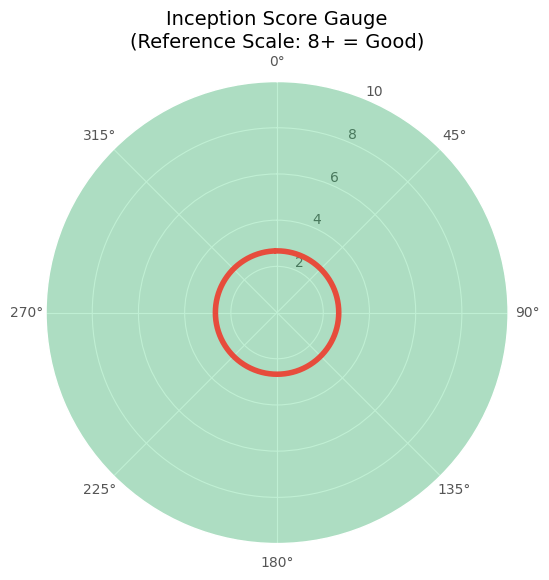

C:\Users\Vedant\AppData\Local\Temp\ipykernel_17708\3585698480.py:83: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Vedant\AppData\Local\Temp\ipykernel_17708\3585698480.py:83: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



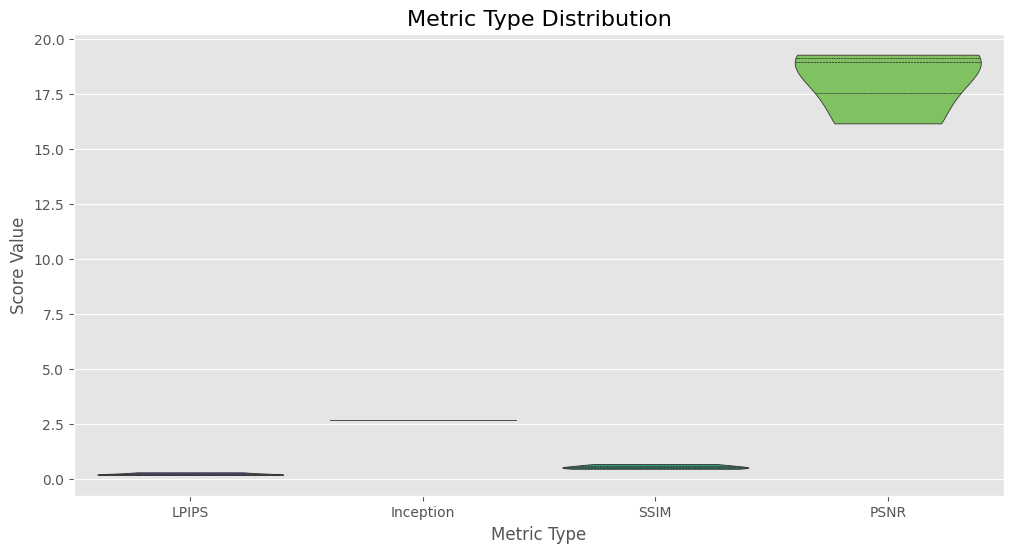

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

# Load data
df = pd.read_csv('evaluation_scores.csv')

# Preprocess data
df['Metric_Type'] = df['Metric'].str.extract('(LPIPS|SSIM|PSNR|Inception)')
df['Comparison_Stage'] = df['Metric'].str.extract(r'(Original vs Emotion|Emotion vs Anime|Original vs Anime)')
df['Score'] = df['Score'].round(2)

# Set style
plt.style.use('ggplot')  # Using 'ggplot' as an alternative style
palette = sns.color_palette("viridis", n_colors=10)

# 1. Metric Comparison Bar Plot (Matplotlib)
plt.figure(figsize=(14, 8))
bars = plt.barh(df['Metric'], df['Score'], color=palette)
plt.title('Comprehensive Model Evaluation Metrics', fontsize=16)
plt.xlabel('Score Value', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.xlim(0, max(df[df['Metric_Type'] != 'Inception']['Score']) + 0.2)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Radar Chart (Plotly)
fig = px.line_polar(
    df[df['Metric_Type'] != 'Inception'], 
    r='Score', 
    theta='Metric',
    line_close=True,
    color_discrete_sequence=['#2ecc71'],
    template='plotly_dark',
    title='Perceptual Metric Radar Chart'
)
fig.update_traces(fill='toself')
fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 1])))
fig.show()

# 3. Stage Comparison Heatmap (Seaborn)
heatmap_df = df[df['Metric_Type'].isin(['LPIPS', 'SSIM', 'PSNR'])].pivot(
    index='Metric_Type', 
    columns='Comparison_Stage', 
    values='Score'
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, cmap='magma', fmt=".2f",
           annot_kws={'size':12}, linewidths=0.5)
plt.title('Stage Comparison Heatmap', fontsize=16)
plt.xlabel('Comparison Stage', fontsize=12)
plt.ylabel('Metric Type', fontsize=12)
plt.show()

# 4. Inception Score Gauge Chart (Matplotlib)
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

max_score = 10  # Theoretical maximum for reference
value = df[df['Metric_Type'] == 'Inception']['Score'].values[0]

angles = np.linspace(0, 2*np.pi, 100, endpoint=False)
ax.fill(angles, [max_score]*100, color='#2ecc7133', alpha=0.3)
ax.plot(angles, [value]*100, color='#e74c3c', linewidth=4)
ax.set_ylim(0, max_score)
ax.set_title('Inception Score Gauge\n(Reference Scale: 8+ = Good)', fontsize=14)
plt.show()

# 5. Metric Type Distribution (Seaborn Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Metric_Type', y='Score', data=df, 
              inner='quartile', palette='viridis',
              cut=0, scale='width')
plt.title('Metric Type Distribution', fontsize=16)
plt.xlabel('Metric Type', fontsize=12)
plt.ylabel('Score Value', fontsize=12)
plt.show()

# 6. Interactive 3D Surface (Plotly)
fig = px.scatter_3d(df, ,.
                   x='Metric_Type', 
                   y='Comparison_Stage', 
                   z='Score',
                   +
                   color='Score',
                   size='Score',
                   hover_name='Metric',
                   title='3D Metric Relationships',
                   color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(scene=dict(
                    xaxis_title='Metric Type',
                    yaxis_title='Comparison Stage',
                    zaxis_title='Score Value'),
                  height=800)
fig.show()


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# from your_model import EmotionAnimeGANModel  # Uncomment and replace with your actual model definition

# Hyperparameters
batch_size = 32
learning_rate = 0.0002
epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define data transforms (adjust based on your model's input requirements)
data_transforms = transforms.Compose([
    transforms.Resize((64, 64)),  # Adjust size to match your model's input
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Adjust normalization if needed
])

# Load datasets using ImageFolder
train_dataset = datasets.ImageFolder(
    root=r"C:\Users\Vedant\Desktop\animegan2-pytorch\data\original_faces",
    transform=data_transforms
)
val_dataset = datasets.ImageFolder(
    root=r"C:\Users\Vedant\Desktop\animegan2-pytorch\data\generated_faces",
    transform=data_transforms
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load the model (replace with your actual model)
# model = EmotionAnimeGANModel().to(device)
# model_dict = torch.load(r"C:\Users\Vedant\Desktop\animegan2-pytorch\saved_models\model_dict.pth", map_location=device)
# model.load_state_dict(model_dict)

# Placeholder for model (since I don't have your model definition)
# Comment out the above and uncomment below if you want to test with a dummy model
class EmotionAnimeGANModel(nn.Module):
    def __init__(self):
        super(EmotionAnimeGANModel, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc = nn.Linear(64 * 64 * 64, len(train_dataset.classes))  # Adjust output size based on number of classes

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

model = EmotionAnimeGANModel().to(device)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Loss function
criterion = nn.CrossEntropyLoss()

# Function to calculate loss
def calculate_loss(loader, model, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(loader)

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    val_loss = calculate_loss(val_loader, model, criterion)
    
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Training Loss: {avg_train_loss:.4f}, "
          f"Validation Loss: {val_loss:.4f}")

# Save the model
torch.save(model.state_dict(), 'emotion_animegan_model_trained.pth')

FileNotFoundError: Couldn't find any class folder in C:\Users\Vedant\Desktop\animegan2-pytorch\data\original_faces.

In [8]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
